In [102]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import manipulations, viz_schema, standard_data_process as sdp, data_preparation as dp, enums as viz_enums
from e2slib.structures import enums, datetime_schema
from datetime import datetime
from src.visualization import visualize, viz_types, plot_styles
from pathlib import Path

In [104]:
demand = dummy_data.create_dummy_site_demand(2022)

save_path = Path(r'/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/e2s-softwares/Lyra/08 - Customers/06 - Bender/02 - Ressources/03 - Test data (EVs + Chargers)/submeter_data.csv')
bender_submeters = pd.read_csv(save_path, index_col=0, parse_dates=True)

In [105]:
bender_submeters

,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Datetime,,,,,,,,
2022-01-01 00:00:00,7.569785,0.576742,0.039946,0.585969,0.025802,1.261809,0.429955,0.052258
2022-01-01 00:30:00,6.771641,0.497238,0.041149,0.586528,0.025639,1.261356,0.432854,0.051954
2022-01-01 01:00:00,8.596677,0.554560,0.117282,0.585901,0.025691,1.260377,0.456698,0.051572
2022-01-01 01:30:00,7.786236,0.495641,0.039423,0.586005,0.025465,1.261335,0.423382,0.051665
2022-01-01 02:00:00,6.929411,0.558504,0.039517,0.586479,0.025546,1.263387,0.389958,0.051862
...,...,...,...,...,...,...,...,...
2022-12-31 21:30:00,9.456592,0.683685,0.037827,0.830455,0.025385,1.065136,0.388373,0.052078
2022-12-31 22:00:00,10.520131,0.559935,0.037847,0.830912,0.025454,1.065482,0.402404,0.052249
2022-12-31 22:30:00,8.988758,0.559554,0.037766,0.832230,0.025435,1.064953,0.405647,0.052079


### Data cleaner

Initialised with the data to be cleaned an a list of cleaners. The cleaners available are:

1. dp.OutlierRemover(method:str = 'iqr).datacleaner() - Only interquartile reange method currently in use.
2. dp.FillMissingData(func:str = 'rollingfill').datacleaner() - func can be rollingfill & meanfill. If rollingfill leaves NaN values mean is used.
3. dp.GenerateDatetime(start_date: datetime = datetime(2022, 1, 1), freq: str = '30T', periods: int = 48, tz: str = 'UTC') - applies datetime to your dataset.


In [106]:
cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

test = sdp.DataPrep(bender_submeters, cleaner_list)

Prior to cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694


Post cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,3.871877,0.723830,0.321299,0.636369,0.025243,1.203781,0.509493,0.177645
StD,3.616988,0.173279,0.580963,0.072358,0.002469,0.083532,0.122784,0.330845
Min,0.238472,0.430443,0.035838,0.453167,0.018273,1.058588,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.018813,1.060478,0.384565,0.040023
25%,0.793048,0.611870,0.038633,0.580715,0.024502,1.149817,0.422485,0.046129
50%,2.446349,0.673542,0.040107,0.668476,0.025496,1.220203,0.482347,0.050143
75%,6.058010,0.775172,0.216827,0.685800,0.026099,1.269096,0.548906,0.116300
99%,13.523658,1.259118,2.419109,0.830969,0.033966,1.307534,1.018762,1.767503


### DataManip

Takes data & meta data and manipulates the data as requested.

In [107]:
metadata_dict = {'DB_11': {'Name': 'DB_11', 
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': [],
                                  'index_cols': [],
                                  'groupby_cols': []},
                      'DB_3': {'Name': 'DB_3',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': [],
                                  'index_cols': [],
                                  'groupby_cols': []},
                      'DB_4': {'Name': 'DB_4',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': [],
                                  'index_cols': [],
                                  'groupby_cols': []},
                      'DB_5': {'Name': 'DB_5',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': [],
                                  'index_cols': [],
                                  'groupby_cols': []},
                      'DB_6': {'Name': 'DB_6',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': [],
                                  'index_cols': [],
                                  'groupby_cols': []},
                      'DB_9': {'Name': 'DB_9',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': [],
                                  'index_cols': [],
                                  'groupby_cols': []},
                      'DB_10': {'Name': 'DB_10',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': [],
                                  'index_cols': [],
                                  'groupby_cols': []},
                      'DB_12': {'Name': 'DB_12',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': [],
                                  'index_cols': [],
                                  'groupby_cols': []}}

In [108]:
if len([]):
    print("test")

In [109]:
meta_data = sdp.MetaData(metadata_dict)

new_test = sdp.DataManip(test.data, metadata=meta_data)

In [110]:
len(new_test.metadata.get_legend('DB_11')) > 0

False

### DataViz

How plots will be generated.

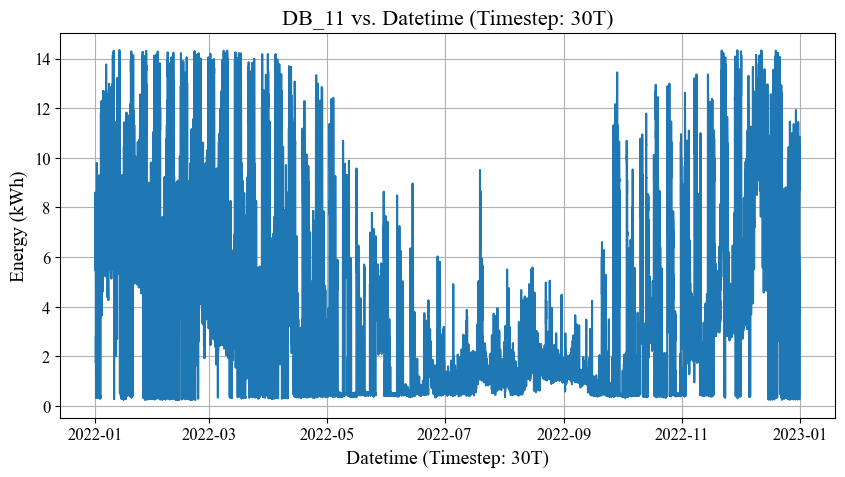

In [111]:
viz_boi = visualize.DataViz(new_test.data, new_test.metadata, plot_styles.MatPlotLibPlot()).single_line_plot(['DB_11']) #MatPlotLibPlot() or PlotlyPlot() 

In [112]:
blarg = new_test.groupby(viz_schema.GroupingKeySchema.DAY, inplace=False) # Average week of a year.
blarg.metadata.metadata['DB_11']

{'Name': 'DB_11',
 'Units': <UnitsSchema.WH: ('Wh', 'Energy')>,
 'Prefix': <Prefix.K: ('k', 2)>,
 'Freq': '30T',
 'Type': <DataType.FLOAT: <class 'float'>>,
 'Legend': ['Weekday flag'],
 'index_cols': ['Half-hour'],
 'groupby_cols': ['Weekday flag', 'Half-hour']}

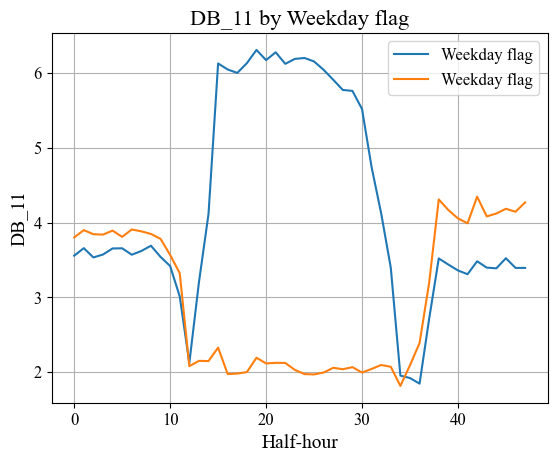

In [114]:
grouped = df.groupby('Weekday flag')

fig, ax = plt.subplots()

for name, group in grouped:
    # weekday_flag = name
    
    ax.plot(group['Half-hour'], group['DB_11'], label='Weekday flag')

ax.set_xlabel('Half-hour')
ax.set_ylabel('DB_11')
ax.set_title('DB_11 by Weekday flag')

ax.legend()

plt.grid()
plt.show()

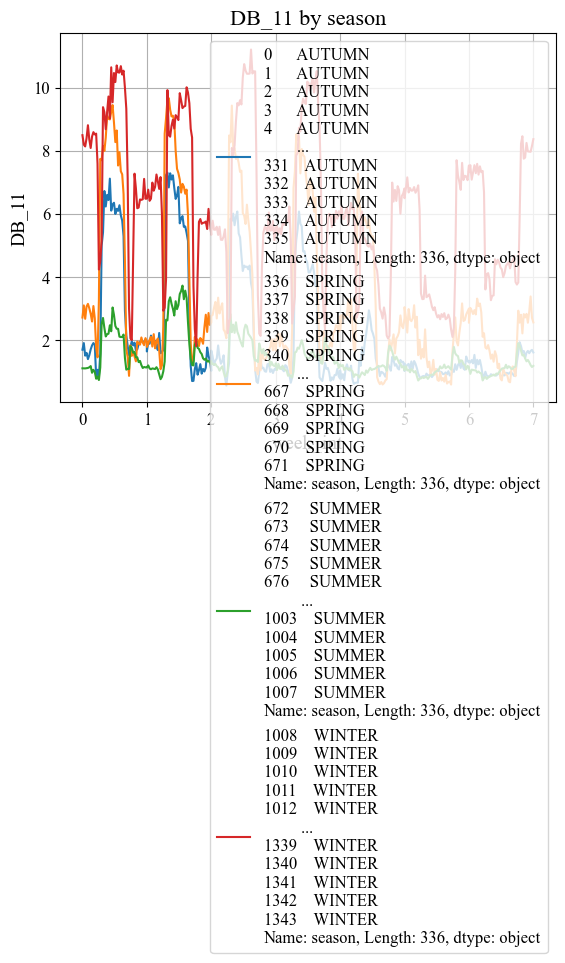

In [134]:
df = testing.reset_index()
df['week_int'] = df['Day of week'] + ((1/df['Half-hour'].max())*df['Half-hour'])
grouped = df.groupby('season')
fig, ax = plt.subplots()

for name, group in grouped:
    # season = name
    
    ax.plot(group['week_int'], group['DB_11'], label=name)
    ax.set_title('DB_11 by season')

    ax.set_xlabel('week_int')
    ax.set_ylabel('DB_11')

ax.legend()

plt.grid()
plt.show()

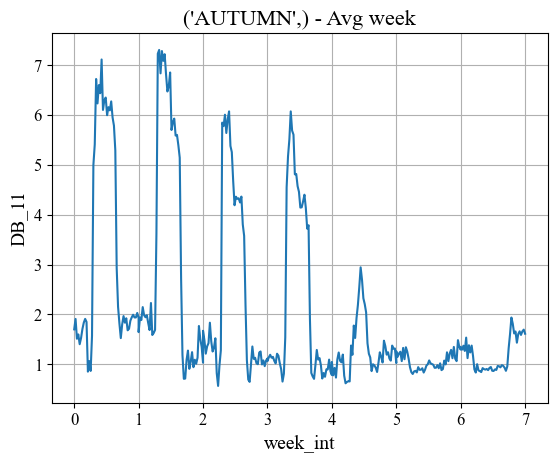

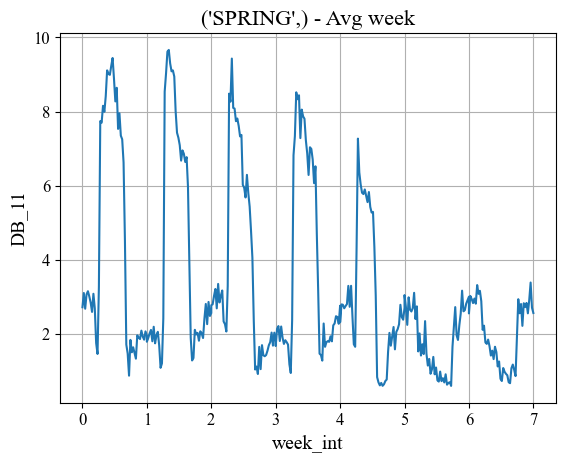

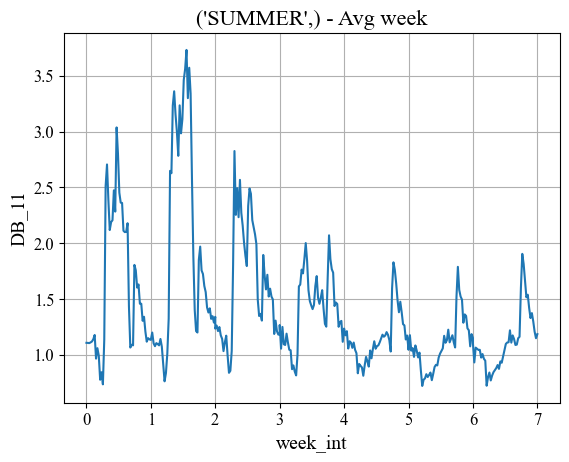

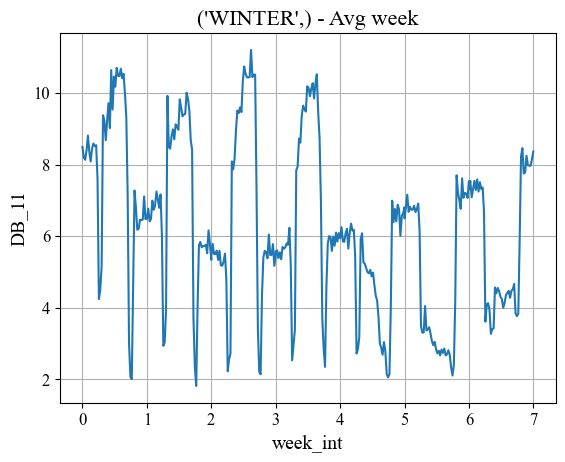

In [119]:
grouped = df.groupby(['season'])

for name, group in grouped:
    fig, ax = plt.subplots()
    ax.set_title(f'{name} - Avg week')
    ax.plot(group['week_int'], group['DB_11'])
    
    ax.set_xlabel('week_int')
    ax.set_ylabel('DB_11')
    
    plt.grid()
    plt.show()

In [120]:
new_class = new_test.groupby(viz_schema.GroupingKeySchema.DAY_SEASON)
new_class.metadata.metadata['DB_11']

{'Name': 'DB_11',
 'Units': <UnitsSchema.WH: ('Wh', 'Energy')>,
 'Prefix': <Prefix.K: ('k', 2)>,
 'Freq': '30T',
 'Type': <DataType.FLOAT: <class 'float'>>,
 'Legend': ['season', 'Weekday flag'],
 'index_cols': ['Half-hour'],
 'groupby_cols': ['season', 'Weekday flag', 'Half-hour']}

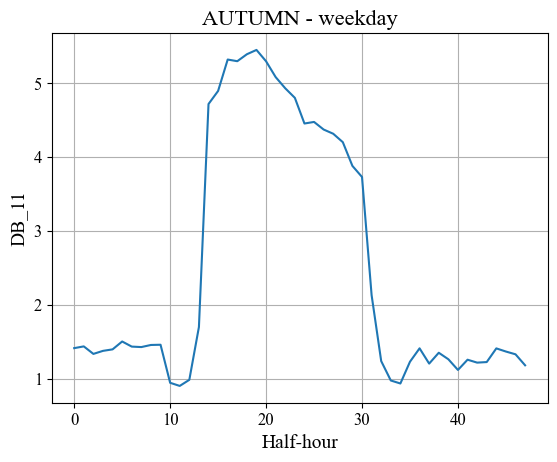

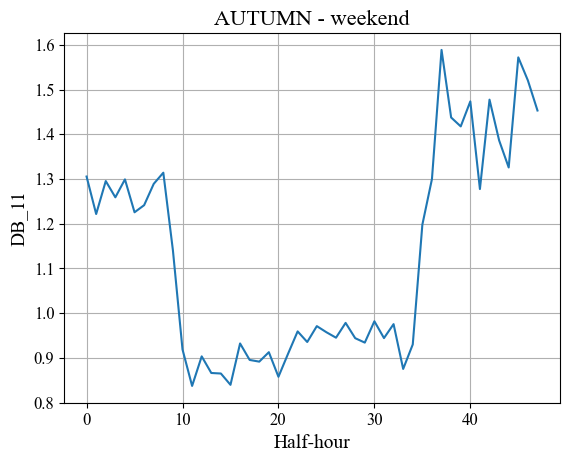

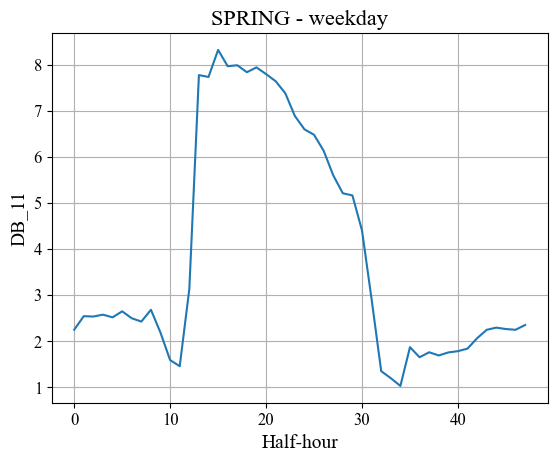

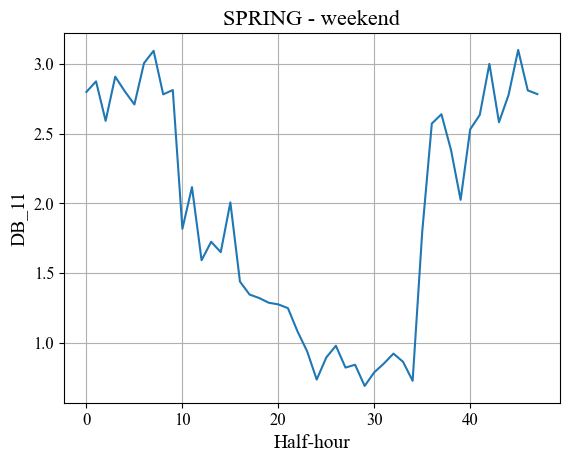

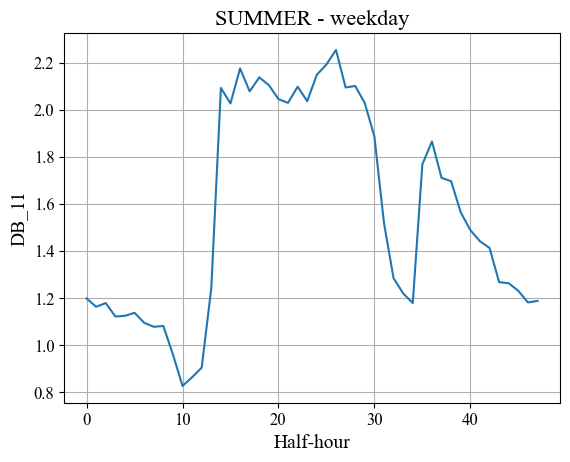

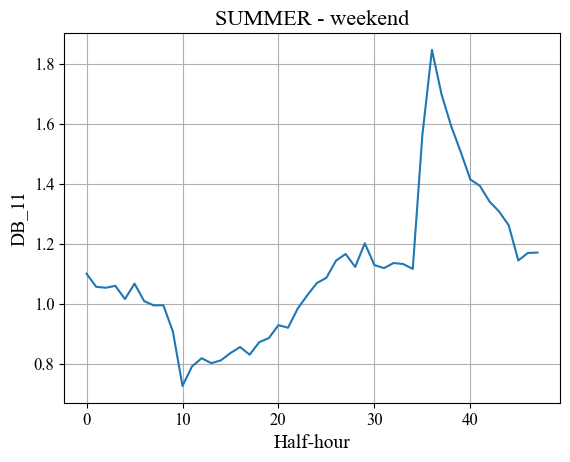

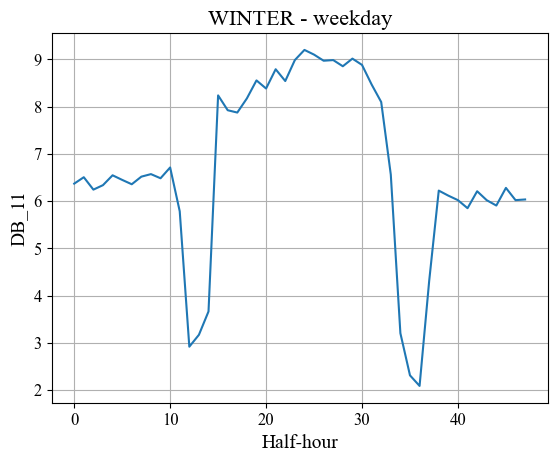

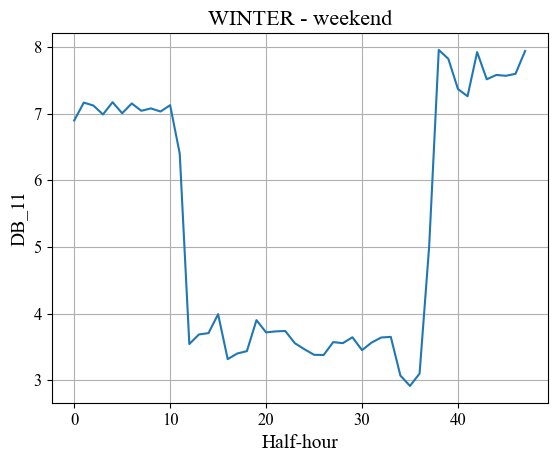

In [121]:
 # Average weekday/weekend day for each season across the year.
df = new_class.data.reset_index()
grouped = df.groupby(['season', 'Weekday flag'])

for name, group in grouped:
    # season, weekday_flag = name
    fig, ax = plt.subplots()
    ax.set_title(f'{name[0]} - {name[1]}')
    
    ax.plot(group['Half-hour'], group['DB_11'])
    
    ax.set_xlabel('Half-hour')
    ax.set_ylabel('DB_11')
    
    plt.grid()
    plt.show()

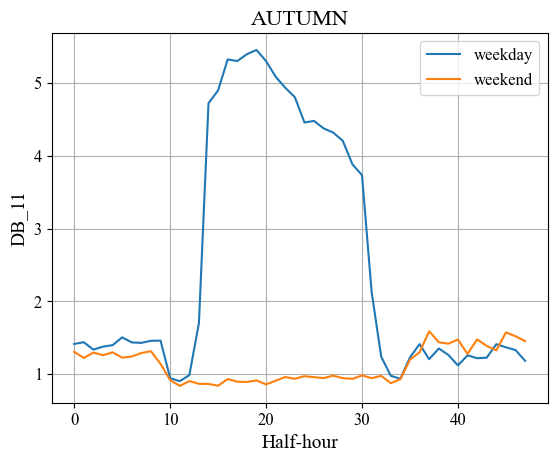

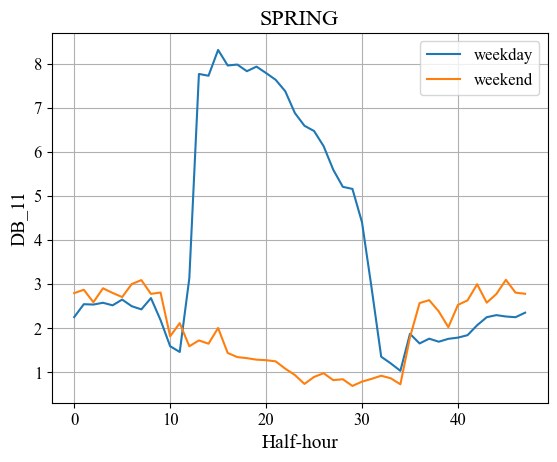

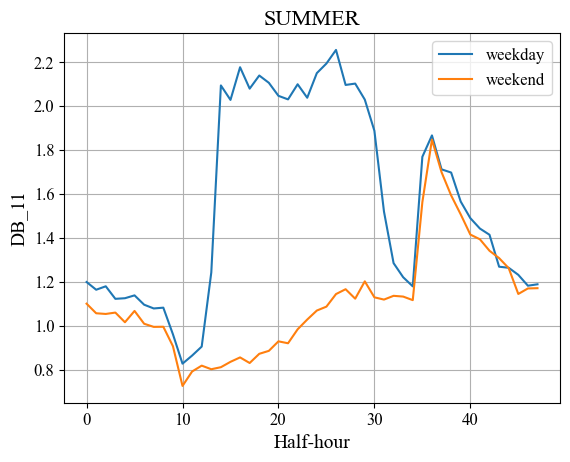

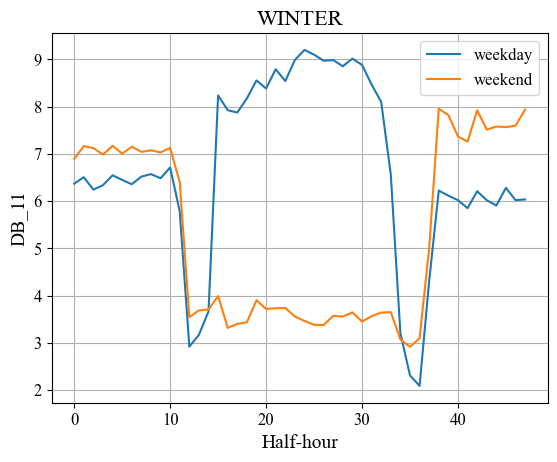

In [122]:
new_class = new_test.groupby(viz_schema.GroupingKeySchema.DAY_SEASON) # Average weekday/weekend day for each season across the year.
df = new_class.data.reset_index()

grouped_season = df.groupby('season')

for season, season_group in grouped_season:
    fig, ax = plt.subplots()
    
    ax.set_title(season)
    grouped_weekday_flag = season_group.groupby('Weekday flag')
    
    for weekday_flag, group in grouped_weekday_flag:
        ax.plot(group['Half-hour'], group['DB_11'], label=weekday_flag)

    ax.set_xlabel('Half-hour')
    ax.set_ylabel('DB_11')
    
    ax.legend()
    plt.grid()
    
    plt.show()

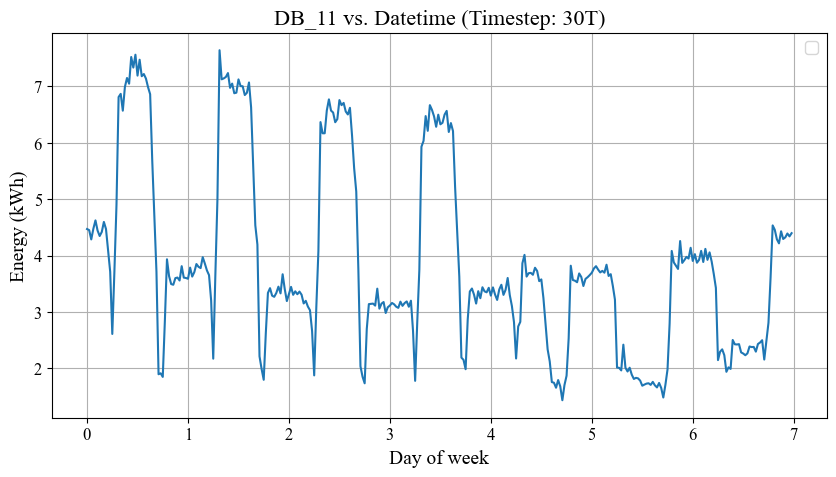

In [133]:
grouped_class = new_test.groupby(datetime_schema.DateTimeSchema.WEEK) # viz_schema.GroupingKeySchema.DAY_SEASON
grouped_data: pd.DataFrame = grouped_class.data
grouped_meta: sdp.MetaData = grouped_class.metadata
data_viz = visualize.DataViz(grouped_data, grouped_meta, plot_styles.MatPlotLibPlot())
data_viz.single_line_plot(['DB_11']) #MatPlotLibPlot() or PlotlyPlot()

---

## Secondary example

In [124]:
# import src.chpqa_test_files.import_data as import_data

# user_path =  Path(r"/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/") # Rhys
# #user_path =  Path(r"/Users/sceac10/Library/CloudStorage/GoogleDrive-alexandre.canet@e2s.energy/Shared drives/") # Alex
# path = user_path / r"e2s-softwares/Lyra/06 - Prototypes/CHPQA/03 - Data/"

# dataf = import_data.compile_data(path).pipe(import_data.clean_data).pipe(import_data.transform_raw_dataf)
# dataf = dataf.loc[dataf.index.drop_duplicates()]

In [125]:
# cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

# test = sdp.DataPrep(dataf, cleaner_list)

In [126]:
# chpqa_data_dict = {'column_1': {'Name': 'CHP_electricity', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_2': {'Name': 'CHP_total_heat', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_3': {'Name': 'CHP_heat', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_4': {'Name': 'CHP_gas', 
#                                   'Units': viz_enums.UnitsSchema.SM3,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_5': {'Name': 'Boiler_1_heat', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_6': {'Name': 'Boiler_2_heat', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_7': {'Name': 'Boiler_3_heat', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_8': {'Name': 'Boiler_1_gas', 
#                                   'Units': viz_enums.UnitsSchema.SM3,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_9': {'Name': 'Boiler_2_gas', 
#                                   'Units': viz_enums.UnitsSchema.SM3,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_10': {'Name': 'Boiler_3_gas', 
#                                   'Units': viz_enums.UnitsSchema.SM3,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_11': {'Name': 'Total_heat_MWh', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_12': {'Name': 'Total_gas_MWh', 
#                                   'Units': viz_enums.UnitsSchema.SM3,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT}}

In [127]:
# column_lists = sdp.generate_column_classes(dataf, chpqa_data_dict)

In [128]:
# column_lists[0].data.min()

In [129]:
# data_with_meta.groupby('day', )
# matplotlib_viz = MatplotlibViz()


# def single_timeserie_plot(libraryViz, data, **kwargs):
#     libraryViz.basic_plot(data, **kwargs)


In [130]:
# for i in range(len(column_lists)):
#     column_lists[i].plot_all()